Please write your code in Jupyter Notebook or Google Colab. \
You need to compress the Jupyter notebook and your saved model checkpoint into a zip file and submit the zip file to Canvas. \
**Note**: Please restart the Jupyter notebook kernel and check if your code is executable before submission.

In this assignment, you need to implement a ResNet classifier (https://arxiv.org/abs/1512.03385) for an image classification task. 
ResNet consists of many modules discussed in the class, such as convolution layers, short-cut connection, and batch normalization.

Please train and evaluate a ResNet-20 classifier (ResNet with 20 layers) on the CIFAR10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). 
The CIFAR10 dataset is a classic dataset for the image classification task, which consists of 60000 32x32 RGB images in 10 classes. 

**Hints:**
1. The original ResNet model is implemented on 224x224x3 images. You need to modify the model architecture to fit the image size of 32x32x3 in the CIFAR10 dataset. 
2. You are strongly encouraged to use the deep learning frameworks (e.g., Pytorch, Tensorflow, Keras) for building the model, but other frameworks are allowed. 
3. You can use the basic modules (Fully Connected Layer, Convolution Layer, Dropout, Batch Normalization, etc) in these frameworks, but the existing implementations of ResNet is not allowed to use in this assignment. However, it would be helpful for you to learn from the existing implementations.
4. You can use the CIFAR10 datasets provided by the frameworks (e.g., https://pytorch.org/vision/stable/datasets.html#cifar, https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10).

**This assignment will be graded as follows.**

1. (10 pts) Load and preprocess data from the CIFAR10 dataset.
1. (40 pts) Implement the ResNet-20 classifier.
2. (10 pts) Train the model using a proper optimization method and loss function.
3. (10 pts) Plot the training and test accuracy in each epoch (or iteration) in the Jupyter notebook.
4. (10 pts)  Save the weights of final model in the same directory of Jupyter notebook.
5. (10 pts)  Load the weights into your model and report the training and test accuracy.
6. (10 pts) The test accuracy should be higher than 84\%.
7. (5 bonus pts) Bonus points are given if the test accuracy is higher than 91\%.

# **Solution**

In [ ]:
# Import packages
import tensorflow as tf
from keras.layers import ZeroPadding2D
from keras.regularizers import l2
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# 1. (10 pts) Load and preprocess data from the CIFAR10 dataset

# Load the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Convert the pixel values of the images to floats between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert the labels to one-hot encoded vectors
num_classes = 10
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
# 2. (40 pts) Implement the ResNet-20 classifier

# Define the input shape
input_shape = (32, 32, 3)

# Define the ResNet-20 model
# Define input layer
inputs = tf.keras.Input(shape=input_shape)

# First Convolutional Block
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
shortcut_1_input = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(shortcut_1_input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation=None, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

shortcut_1 = tf.keras.layers.Activation('relu')(tf.keras.layers.add([x, shortcut_1_input]))

# Second Convolutional Block
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(shortcut_1)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation=None, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

shortcut_2 = tf.keras.layers.Activation('relu')(tf.keras.layers.add([x, shortcut_1]))

# Third Convolutional Block
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(shortcut_2)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation=None, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

shortcut_3 = tf.keras.layers.Activation('relu')(tf.keras.layers.add([x, shortcut_2]))

# Fourth Convolutional Block
x = ZeroPadding2D(padding=1)(shortcut_3)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='valid', strides=(2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation=None, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

shortcut_4_input = tf.keras.layers.Conv2D(32, (1, 1), activation=None, padding='valid', strides=(2, 2))(shortcut_3)
shortcut_4_input = tf.keras.layers.BatchNormalization()(shortcut_4_input)

shortcut_4 = tf.keras.layers.Activation('relu')(tf.keras.layers.add([x, shortcut_4_input]))

# Fifth Convolutional Block
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(shortcut_4)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation=None, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

shortcut_5 = tf.keras.layers.Activation('relu')(tf.keras.layers.add([x, shortcut_4]))

# Sixth Convolutional Block
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(shortcut_5)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation=None, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

shortcut_6 = tf.keras.layers.Activation('relu')(tf.keras.layers.add([x, shortcut_5]))

# Seventh Convolutional Block
x = ZeroPadding2D(padding=1)(shortcut_6)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='valid', strides=(2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

shortcut_7_input = tf.keras.layers.Conv2D(64, (1, 1), activation=None, padding='valid', strides=(2, 2))(shortcut_6)
shortcut_7_input = tf.keras.layers.BatchNormalization()(shortcut_7_input)

shortcut_7 = tf.keras.layers.Activation('relu')(tf.keras.layers.add([x, shortcut_7_input]))

# Eighth Convolutional Block
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(shortcut_7)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

shortcut_8 = tf.keras.layers.Activation('relu')(tf.keras.layers.add([x, shortcut_7]))

# Nineth Convolutional Block
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(shortcut_8)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

shortcut_9 = tf.keras.layers.Activation('relu')(tf.keras.layers.add([x, shortcut_8]))

# Final Classification Layers
x = tf.keras.layers.GlobalAveragePooling2D()(shortcut_9)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Print the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 16)   448         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 16)  64          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 16)   2320        ['batch_normalization[0][0]']

In [ ]:
# 3. (10 pts) Train the model using a proper optimization method and loss function.

# Define the optimizer, loss function, and metrics for training the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

# Train the model
batch_size = 128
num_epochs = 20
history = model.fit(train_images, train_labels, batch_size=batch_size,epochs=num_epochs, validation_data=(test_images, test_labels))

Epoch 1/20
391/391 [==============================] - 733s 2s/step - loss: 1.4382 - accuracy: 0.4760 - val_loss: 1.4788 - val_accuracy: 0.4497
Epoch 2/20
391/391 [==============================] - 699s 2s/step - loss: 0.9775 - accuracy: 0.6521 - val_loss: 1.1178 - val_accuracy: 0.6216
Epoch 3/20
391/391 [==============================] - 695s 2s/step - loss: 0.7736 - accuracy: 0.7265 - val_loss: 0.9688 - val_accuracy: 0.6722
Epoch 4/20
391/391 [==============================] - 692s 2s/step - loss: 0.6411 - accuracy: 0.7778 - val_loss: 0.9155 - val_accuracy: 0.6931
Epoch 5/20
391/391 [==============================] - 695s 2s/step - loss: 0.5498 - accuracy: 0.8073 - val_loss: 0.9252 - val_accuracy: 0.6924
Epoch 6/20
391/391 [==============================] - 700s 2s/step - loss: 0.4805 - accuracy: 0.8326 - val_loss: 0.8447 - val_accuracy: 0.7291
Epoch 7/20
391/391 [==============================] - 695s 2s/step - loss: 0.4181 - accuracy: 0.8557 - val_loss: 1.2557 - val_accuracy: 0.6512

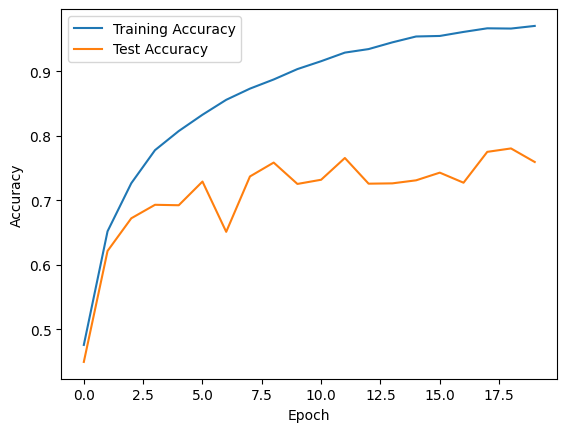

In [ ]:
# 4. (10 pts) Plot the training and test accuracy in each epoch (or iteration) in the Jupyter notebook

# Plot the training and test accuracy in each epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# 5. (10 pts) Save the weights of final model in the same directory of Jupyter notebook.

# Save and download the final model
model.save('resnet20_modified.h5')
files.download('resnet20_modified.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 6. (10 pts) Load the weights into your model and report the training and test accuracy.

# Load the saved model weights
model_loaded = tf.keras.models.load_model('resnet20_modified.h5')

# Evaluate the model on the training and test data
train_loss, train_acc = model_loaded.evaluate(train_images, train_labels)
test_loss, test_acc = model_loaded.evaluate(test_images, test_labels)

print(f'Training accuracy: {train_acc:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 30s 97ms/step - loss: 1.1076 - accuracy: 0.7594
Training accuracy: 0.9042
Test accuracy: 0.7594
